In [0]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn 
from sklearn.impute  import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 


In [0]:
# read data from the file "income_evaluation.csv"
data=pd.read_csv("income_evaluation.csv")


In [5]:
# 1st 5 elemnts of the dataset
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#descriptive statistics on the numerical features
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [68]:
# some columns name contain space and special caracter like - unstead of _ which will disturb our work 
print("old columns names : ",data.columns.tolist())
# change the column names    
data.columns=["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"]
print ( "new column names without space : ",data.columns.tolist())

old columns names :  ['age', ' workclass', ' fnlwgt', ' education', ' education-num', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country', ' income']
new column names without space :  ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']


#DataAnalysis

Text(0, 0.5, 'number of persons')

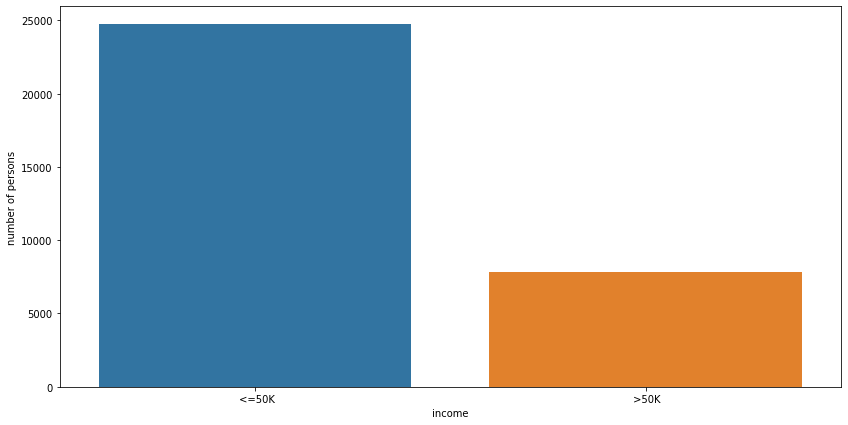

In [8]:
#plot 
plt.figure(figsize=(14,7))
sns.countplot(data["income"])
plt.xlabel("income")
plt.ylabel("number of persons")

 **====> Data is unbalanced : persons with income <=50k represent almost all the dataset** 

Text(0, 0.5, 'number of persons')

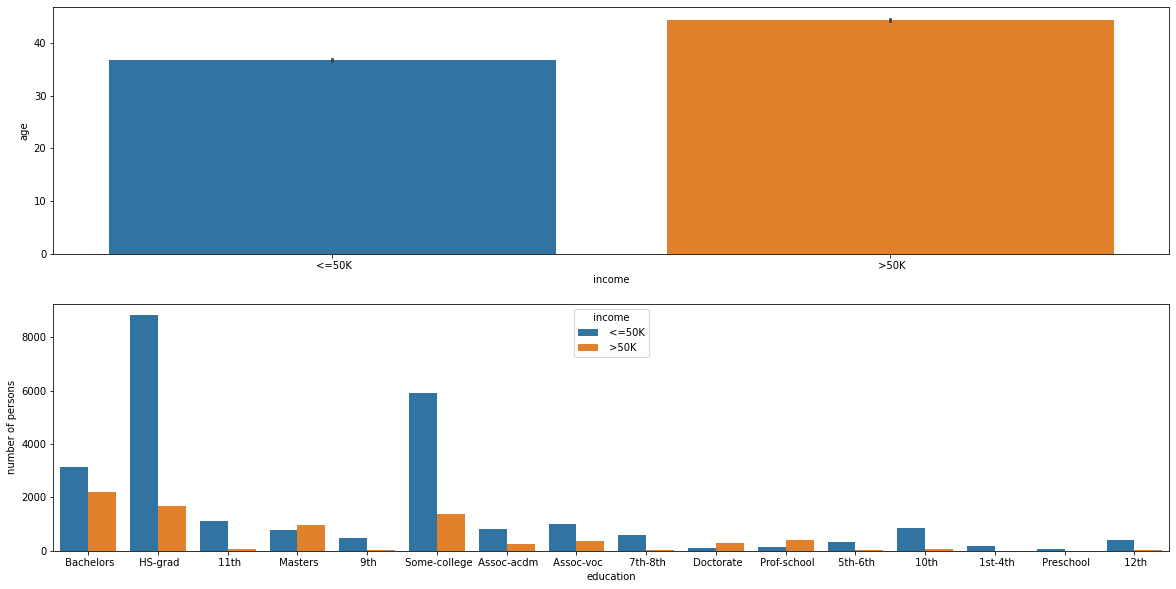

In [14]:
f, axe = plt.subplots(2, 1, figsize=(20,10))
# The first plot is a barplot showing data distribution per age
# visualise the influence of the age on the income

sns.barplot(x=data['income'], y=data['age'], ax = axe[0])

# The second plot a count plot showing data distribution per education level 

sns.countplot(data['education'], hue=data['income'])
plt.ylabel("number of persons")

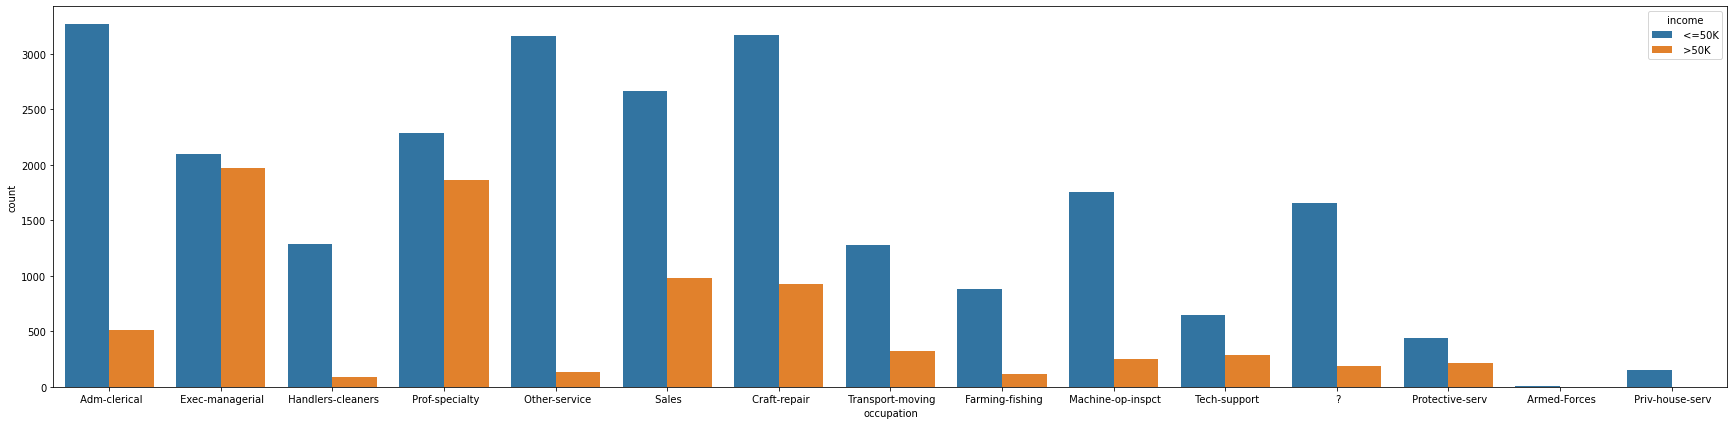

In [15]:
# visualise the influence of the occupation on the income
plt.figure(figsize=(30,7))
sns.countplot(data['occupation'], hue=data["income"])


Text(0, 0.5, 'number of persons')

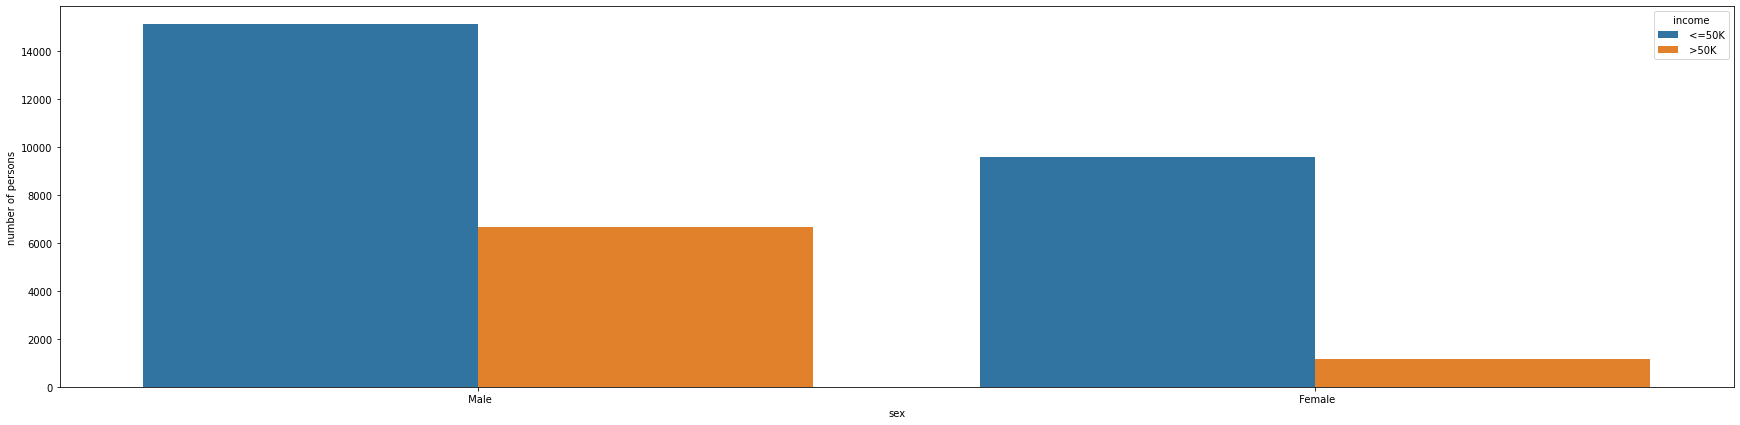

In [16]:
# visualise the influence of the sex on the income
plt.figure(figsize=(30,7))
sns.countplot(data['sex'], hue=data["income"])
plt.ylabel("number of persons")

**==> Data shows that there is a huge gender pay gap : women get paid less than men**

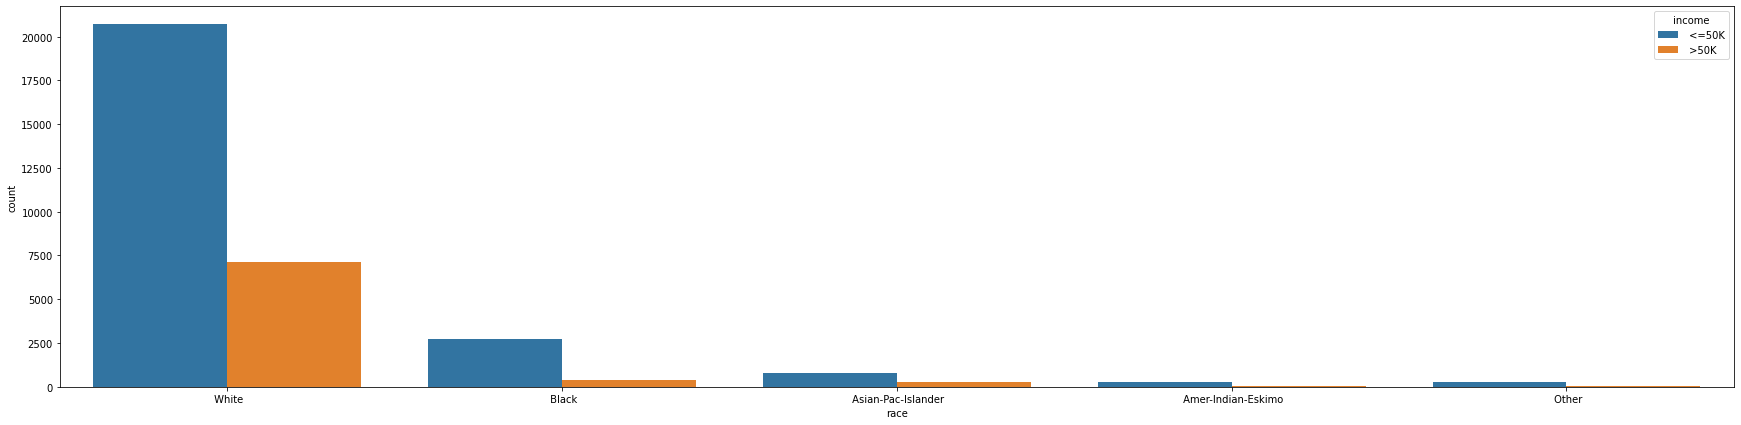

In [17]:
# visualise the influence of the race  on the income
plt.figure(figsize=(30,7))
sns.countplot(data['race'], hue=data["income"])


**There is a huge gap between income within different races so the feature race has an important impact on the income**

# DataCleaning (removing missing values)

In [0]:
#columns that contain missing values 
col_miss=[]
for col in data.columns :
  if data[col].isnull().any():
    col_miss.append(col)
col_miss

[]

**==> No Data is missing**

In [0]:
#columns that dont contain any missing values 
col_notmiss=[]
for col in data.columns :
  if not data[col].isnull().any():
    col_notmiss.append(col)
col_notmiss

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

In [48]:
#data.native_country.unique()
data.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [70]:
#remove the ? items from native_coutry
data=data[data.native_country != ' ?']
data.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [69]:
# do the same with other columns 
data=data[data.workclass != ' ?']
#show again
data.workclass.unique()

data=data[data.occupation != ' ?']
#show again
data.occupation.unique()


array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

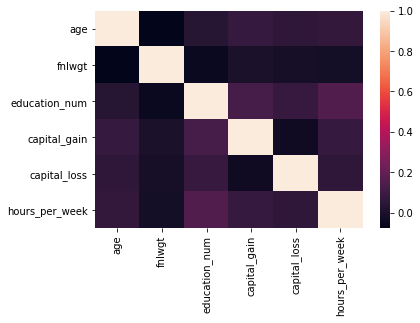

In [21]:
corr=data.corr()
sns.heatmap(corr)

In [0]:
# Remove columns that have more than 0.9 correlation index 
# Here all the correlation index are violet => |correlation| <0.4 so no need for removing any columns



#DataPreprocessing



In [0]:
#the target is string so we convert it to int type : 1 if income >50k 0 else 
data["income"]=[ 0 if x=="<=50k" else 1 for x in data["income"]]

####1st method with one hot encoder 

In [0]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
ohe_columns=['education', 'workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex','native_country']

OHEncode = OneHotEncoder(handle_unknown='ignore', sparse=False)
OHColumns = pd.DataFrame(OHEncode.fit_transform(data[ohe_columns]))

OHColumns.index = data.index

num_data = data.drop(ohe_columns, axis=1)

OH_data = pd.concat([num_data, OHColumns], axis=1)


In [31]:
OH_data.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
0,39,77516,13,2174,0,40,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,0,0,13,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,0,0,40,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,7,0,0,40,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,13,0,0,40,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#new columns
print( OH_data.columns.tolist())

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]


#### 2ème méthode with dummy

In [54]:
# Decide which categorical variables we use in model
for col_name in data.columns:
    if data[col_name].dtypes == 'object':
        unique_cat = len(data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'workclass' has 7 unique categories
Feature 'education' has 16 unique categories
Feature 'marital_status' has 7 unique categories
Feature 'occupation' has 14 unique categories
Feature 'relationship' has 6 unique categories
Feature 'race' has 5 unique categories
Feature 'sex' has 2 unique categories
Feature 'native_country' has 41 unique categories
Feature 'income' has 2 unique categories


In [55]:
# Although, 'native_country' has a lot of unique categories, most categories only have a few observations
print(data['native_country'].value_counts().sort_values(ascending=False).head(10))

 United-States    27504
 Mexico             610
 Philippines        188
 Germany            128
 Puerto-Rico        109
 Canada             107
 El-Salvador        100
 India              100
 Cuba                92
 England             86
Name: native_country, dtype: int64


In [72]:

# In this case, bucket low frequecy categories as "Other"
data['native_country'] = ['United-States ' if x == ' United-States' else 'Other' for x in data['native_country']]

print(data['native_country'].value_counts().sort_values(ascending=False))

United-States     27504
Other              2658
Name: native_country, dtype: int64


In [57]:
#  'education' has a lot of unique categories,but all of them have a lot of observations so we can't remove any 
print(data['education'].value_counts().sort_values(ascending=False).head(10))

 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
Name: education, dtype: int64


In [0]:
# Create a list of features to dummy
todummy_list = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

In [0]:
# Function to dummy all the categorical variables used for modeling
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [75]:
data = dummy_df(data, todummy_list)
data.head(5)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_Other,native_country_United-States
0,39,77516,13,2174,0,40,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
1,50,83311,13,0,0,13,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
2,38,215646,9,0,0,40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
3,53,234721,7,0,0,40,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,28,338409,13,0,0,40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0


In [0]:
#split features from the target with OHEncoder method 
X_ohe = OH_data.drop('income', axis=1)
Y_ohe = pd.DataFrame(OH_data['income'], columns=['income'])

In [0]:
#split features from the target with Dummy method 
X = data.drop('income', axis=1)
Y = pd.DataFrame(data['income'], columns=['income'])

In [77]:
Y.head()

,income
0,1
1,1
2,1
3,1
4,1


In [0]:
## TODO: Split your X and Y to x_train, y_train, x_test, y_test with a ratio of 80% for training and 20% for testing

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=32)




#Training and testing some machine learning model





# Naive Bayes



In [80]:
## TODO: Apply Naive Bayes model on your dataset

from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
model = nb.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy_score(Y_test, Y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

**Accuracy= 1**

#Random Forest Classifier GridSearchCV (n_estimators, max_depth)

In [83]:
## TODO: Apply Random Forest model on your dataset (with GridSearch)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [10,100,300, 500],
    'max_depth' : [10,30,60,90],   
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
gs_rfc_fit = CV_rfc.fit(X_train, Y_train)

gs_rfc_fit.best_params_

rfc_model=RandomForestClassifier(random_state=42, n_estimators= 300, max_depth=30)
rfc_model.fit(X_train, Y_train)
pred=rfc_model.predict(X_test)
accuracy_score(Y_test,pred)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

1.0

**Accuracy=1**

# KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

KNNC = KNeighborsClassifier()

prams = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
}

CV_KNNC = GridSearchCV(estimator=KNNC, param_grid=prams)

f_KNNC = CV_KNNC.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

In [0]:
f_KNNC.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [0]:
KNNC_model = KNeighborsClassifier(n_neighbors=3, weights='distance')
KNNC_model.fit(X_train,Y_train)
pred = KNNC_model.predict(X_test)
accuracy_score(Y_test, pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


1.0

**Accuracy=1**

# Support vector machine with GridSearchCv (gamma, C)

In [87]:
# Apply Support Vector Machine model on your dataset (with GridSearch)

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
svc=SVC()
param_grid = { 
    'gamma' : [0.1,1], 
    'C': [0.01,0.1],
}

CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=2)
gs_svc_fit = CV_svc.fit(X_train, Y_train)
gs_svc_fit.best_params_
svc_model=SVC(C=0.01,gamma=0.1)
svc_model.fit(X_train,Y_train)
pred = svc_model.predict(X_test)
accuracy_score(Y_test,pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [82]:
## TODO: Apply Gradiant boosting model on your dataset (with GridSearch)

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
param_grid = { 
    'n_estimators': [150,300],
    'max_depth' : [10,30], 
    'learning_rate': [0.01,0.1],
}

CV_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1,verbose=1)
gs_gbc_fit = CV_gbc.fit(X_train, Y_train)
gs_gbc_fit.best_params_
gbc_model=GradientBoostingClassifier(random_state=42, n_estimators= 150, max_depth=10,learning_rate=0.1)
gbc_model.fit(X_train,Y_train)
pred=gbc_model.predict(X_test)
accuracy_score(Y_test,pred)

NameError: ignored